In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Carregando os dados do arquivo CSV (substitua 'dataset.csv' pelo caminho do seu arquivo)
data = pd.read_csv('dataset/users_statistics.csv')

In [26]:
def add_approved_column(dataset, answered_questions_to_be_approved):
    # Criando a nova coluna 'approved' com base na condição de número de respostas
    data = dataset.copy()
    data['approved'] = dataset['answered_question_count'] >= answered_questions_to_be_approved

     # Ordenando o DataFrame por 'user_id'
    data.sort_values(by=['answered_question_count','user_id'], ascending=False, inplace=True)
    
    return data

In [27]:
def remove_test_users(dataset):
    return dataset[dataset['sign_in_count'] <= 1500]

In [31]:
data = remove_test_users(data)

In [28]:
data = add_approved_column(data, 10000)

In [7]:
data.head()

,user_id,answered_question_count,writed_notes_count,sign_in_count,approved
0,3263,25167,449,174,True
1,6445,24041,328,192,True
2,3703,23355,19,207,True
3,1264,21870,11,421,True
4,2467,21249,637,485,True


In [32]:
data.count()

user_id                    1021
answered_question_count    1021
writed_notes_count         1021
sign_in_count              1021
approved                   1021
dtype: int64

In [9]:
# Crie um objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplique a normalização Min-Max às features
df_normalized_min_max = data.copy()  # Faça uma cópia do DataFrame original
df_normalized_min_max[['answered_question_count', 'sign_in_count', 'writed_notes_count']] = scaler.fit_transform(data[['answered_question_count', 'sign_in_count', 'writed_notes_count']])

# Agora, você pode usar df_normalized para plotar o gráfico

In [10]:
# Crie um objeto StandardScaler
scaler = StandardScaler()

# Aplique a normalização Z-score às features
df_normalized_z_score = data.copy()  # Faça uma cópia do DataFrame original
df_normalized_z_score[['answered_question_count', 'sign_in_count', 'writed_notes_count']] = scaler.fit_transform(data[['answered_question_count', 'sign_in_count', 'writed_notes_count']])

# Agora, você pode usar df_normalized para plotar o gráfico


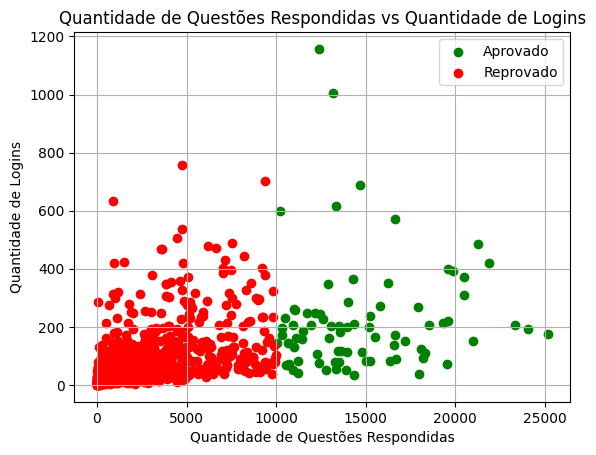

In [11]:
# Separando os dados de alunos aprovados e reprovados
approved_students = data[data['approved']]
rejected_students = data[~data['approved']]

# Plotando o gráfico
plt.scatter( approved_students['answered_question_count'], approved_students['sign_in_count'],color='green', label='Aprovado', marker='o')
plt.scatter( rejected_students['answered_question_count'],rejected_students['sign_in_count'], color='red', label='Reprovado', marker='o')
plt.ylabel('Quantidade de Logins')
plt.xlabel('Quantidade de Questões Respondidas')
plt.title('Quantidade de Questões Respondidas vs Quantidade de Logins')
plt.legend()
plt.grid(True)
plt.show()

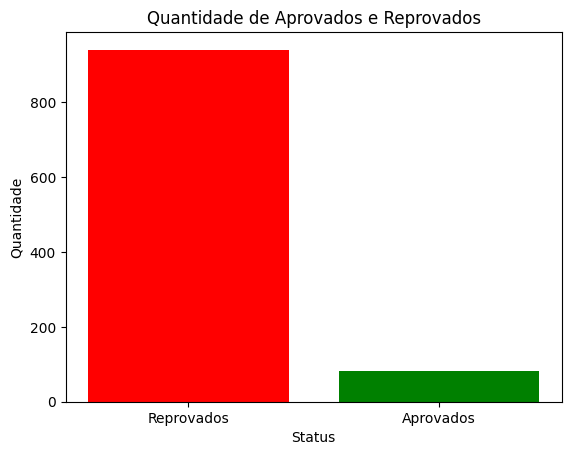

In [12]:
# Contagem de aprovados e reprovados
approved_counts = data['approved'].value_counts()

# Plotando o gráfico
plt.bar(['Reprovados', 'Aprovados'], approved_counts, color=['red', 'green'])
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.title('Quantidade de Aprovados e Reprovados')
plt.show()

In [13]:
scaler = StandardScaler()
data[['answered_question_count_normalized', 'sign_in_count_normalized', 'writed_notes_count_normalized']] = scaler.fit_transform(data[['answered_question_count', 'sign_in_count', 'writed_notes_count']])

# Definindo os dados de entrada (X) e de saída (y)
X = data[['answered_question_count_normalized', 'sign_in_count_normalized', 'writed_notes_count_normalized']]
y = data['approved']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Crie um objeto SelectKBest para usar o teste F ANOVA para seleção de features
k_best_features = SelectKBest(score_func=f_classif, k=2)  # Seleciona as 2 melhores features

# Ajuste o objeto SelectKBest aos dados
k_best_features.fit(X, y)

# Obtenha as pontuações de importância das features
feature_scores = k_best_features.scores_

# Obtenha os índices das features selecionadas
selected_feature_indices = k_best_features.get_support(indices=True)

# Obtenha os nomes das features selecionadas
selected_feature_names = [X.columns[i] for i in selected_feature_indices]

# Imprima as pontuações de importância e os nomes das features selecionadas
print("Pontuações de importância das features:")
for i, score in enumerate(feature_scores):
    print(f"Feature '{X.columns[i]}': {score}")

print("\nFeatures selecionadas:")
for feature_name in selected_feature_names:
    print(feature_name)

Pontuações de importância das features:
Feature 'answered_question_count_normalized': 1712.243925956276
Feature 'sign_in_count_normalized': 143.56319632871893
Feature 'writed_notes_count_normalized': 29.0962385285603

Features selecionadas:
answered_question_count_normalized
sign_in_count_normalized


In [15]:

# Criando e treinando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.9951219512195122

Matriz de Confusão:
[[187   0]
 [  1  17]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       187
        True       1.00      0.94      0.97        18

    accuracy                           1.00       205
   macro avg       1.00      0.97      0.98       205
weighted avg       1.00      1.00      1.00       205



In [16]:

# Coeficientes do modelo
coeficientes = model.coef_[0]

# Nomes das features
nomes_features = X.columns

# Exibir coeficientes de features
for feature, coef in zip(nomes_features, coeficientes):
    print(f'{feature}: {coef}')

answered_question_count_normalized: 4.390800061332851
sign_in_count_normalized: 0.09429091904932684
writed_notes_count_normalized: -0.04969169489549971


In [17]:
# Calcular o VIF para cada feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                              feature       VIF
0  answered_question_count_normalized  1.427800
1            sign_in_count_normalized  1.362712
2       writed_notes_count_normalized  1.084129


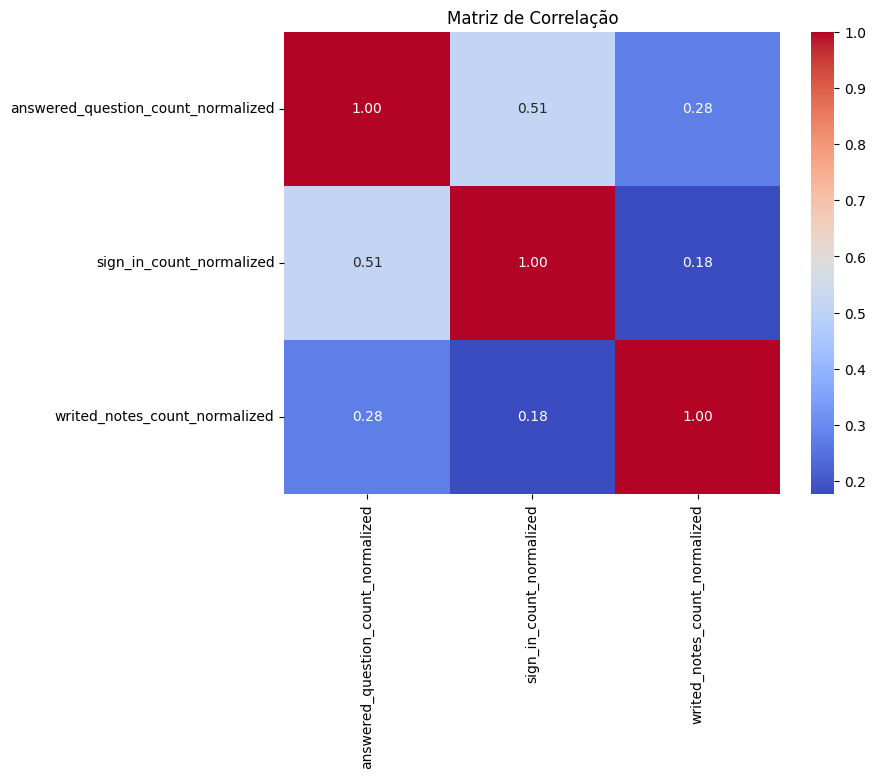

In [18]:
# Calcule a matriz de correlação
correlation_matrix = X.corr()

# Configure o tamanho da figura
plt.figure(figsize=(8, 6))

# Crie o mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adicione um título
plt.title("Matriz de Correlação")

# Exiba o mapa de calor
plt.show()

In [20]:

# Suponha que você tenha novas entradas representadas como um DataFrame chamado 'new_data'
new_data = pd.DataFrame({
    'answered_question_count': [8000, 12000, 9500],
    'sign_in_count': [1000, 5, 8],  # Adicionando a nova coluna 'sign_in_count'
    'writed_notes_count': [1000, 5, 8]
})

# Normalizando os novos dados
new_data[['answered_question_count_normalized', 'sign_in_count_normalized', 'writed_notes_count_normalized']] = scaler.transform(new_data[['answered_question_count', 'sign_in_count', 'writed_notes_count']])  # Normalizando os dados de 'answered_question_count', se necessário

# Fazendo previsões com o modelo treinado
predictions = model.predict(new_data[['answered_question_count_normalized', 'sign_in_count_normalized', 'writed_notes_count_normalized']])

# Exibindo as previsões
for i, pred in enumerate(predictions):
    print(f"Entrada {i+1}: {'Aprovado' if pred else 'Reprovado'}")


Entrada 1: Reprovado
Entrada 2: Aprovado
Entrada 3: Reprovado


In [21]:
# Fazendo previsões com o modelo treinado - Probabilidade
probabilities = model.predict_proba(new_data[['answered_question_count_normalized', 'sign_in_count_normalized', 'writed_notes_count_normalized']])

# Exibindo as previsões de probabilidade
for i, probs in enumerate(probabilities):
    print(f"Entrada {i+1}: Probabilidade de ser aprovado: {probs[1]*100:.2f}%")

Entrada 1: Probabilidade de ser aprovado: 8.38%
Entrada 2: Probabilidade de ser aprovado: 78.32%
Entrada 3: Probabilidade de ser aprovado: 21.57%


Para alterar o valor de corte (threshold) em que o modelo faz a classificação entre as classes, você pode usar a função predict_proba() para obter as probabilidades previstas e, em seguida, aplicar o seu próprio limite personalizado para determinar a classe final.

In [24]:
# Definindo o novo valor de corte (threshold)
new_threshold = 0.3  # Por exemplo, vamos definir o novo limite como 0.3

# Fazendo previsões com o modelo treinado - Probabilidade
probabilities = model.predict_proba(new_data[['answered_question_count_normalized', 'sign_in_count_normalized', 'writed_notes_count_normalized']])

# Exibindo as previsões com o novo valor de corte
for i, probs in enumerate(probabilities):
    if probs[1] >= new_threshold:  # Se a probabilidade de ser aprovado for maior ou igual ao novo limite
        print(f"Entrada {i+1}: Aprovado")
    else:
        print(f"Entrada {i+1}: Reprovado")


Entrada 1: Reprovado
Entrada 2: Aprovado
Entrada 3: Reprovado
